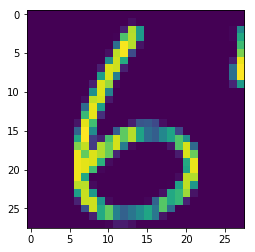

In [19]:
%config IPCompleter.greedy=True

import cv2 as cv
import src.helpers as helpers
from sklearn.externals import joblib
import matplotlib.pyplot as plt

RESIZED_IMAGE_WIDTH = 800
image_path = 'images/notepad.jpg'
image = cv.imread(image_path)
height, width, channels = image.shape
resize_factor = RESIZED_IMAGE_WIDTH/width

image = cv.resize(image, (800, 800), interpolation=cv.INTER_AREA)
processed_image = helpers.preprocess_image(image)

model_file = "digits_cls.pkl"
classifier, preprocessor = joblib.load(model_file)

numbers = helpers.find_numbers(processed_image)

for number in numbers:
    margin = 20
    x, y, w, h = number
    bound_x = x - 40
    bound_y = y - margin
    bound_w = x + w + 40
    bound_h = y + h + margin

    # find region of interest (roi)
    roi = processed_image[bound_y:bound_h, bound_x:bound_w]
    plt.imshow(roi)
    length = 28
    dilate_width = 1
    roi = cv.resize(roi, (length, length), interpolation=cv.INTER_AREA)
    roi = cv.dilate(roi, (dilate_width, dilate_width))
    plt.imshow(roi)
